### Cuaderno 1: Procesos estocásticos

#### Apellidos: Sotillo del Horno
#### Nombre: Iván

1. El trabajo debe ser **individual**. 

2. La entrega consiste en un único fichero `.zip`, cuyo nombre debe ser de la forma 
`<apellido1>_<apellido2>_<nombre>_PE_2020_2021.zip`. En el nombre no se deben utilizar tildes. espacios, mayúsculas, o tildes. Por ejemplo,
`suarez_gonzalez_alberto_PE_2020_2021.zip`.
Este fichero comprimido debe incluir los siguientes ficheros:

    1. Este cuaderno (*notebook*) de Python con las soluciones de ejercicios y las derivaciones en celdas de tipo *markdown*. El notebook debe entregarse con las celdas ejecutadas en orden. En caso de que se prefiera entregar derivaciones manuscritas, se incluirán en el cuaderno de Python como imágenes. 
    2. Ficheros ficheros `.py` necesarios para se pueda ejecutar el código del cuaderno de Python. El notebook debe poder ejecutarse directamente.
   
3. Indicad vuestro nombre y apellidos y fecha de realización al principio de todos los ficheros entregados.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from pe_utils import simulate_markov_chain
from pe_utils import compute_stationary_dist


#### Ejercicio 1.

Consideremos una cadena de Markov con 5 estados, cuya matriz de transición es
$$
\begin{array}{c|c|c|c|c}
\text{Estado inicial / final} & P_1 & P_2 & P_3 & P_4 & P_5\\
\hline
P_1 & *    & 0.2  & 0.1 & 0.4 & 0.3    \\
P_2 & 0.3  & *    & 0.5 & 0.1 & 0.1     \\
P_3 & 0.3  & 0.4  & *   & 0.1 & 0.2     \\
P_4 & 0.3  & 0.3  & 0.1 & *   & 0.3 \\
P_5 & 0.1  & 0.1  & 0.7 & 0.1  & * 
\end{array}
$$

1.  Deriva la solución estacionaria para este proceso. 
2. Simula trayectorias del proceso para $t = 0, 1, 2, ..., N$ suponiendo que en el instante $t = 0$ el sistema se encuentra en el estado $P(t=0)  = P_3$.
3. Haz la gráfica de $3$ de las trayectorias simuladas con $N = 100$. 
4. Utilizando la secuencia de estados de la cadena de Markov en el régimen estacionario:
    1. Estima la distribución estacionaria del proceso a partir de una única trayectoria.
    2. Estima la distribución del proceso en el límite $t \rightarrow \infty$ a partir de los estados finales para $M = 1000$ trayectorias simuladas.
    3. Compara los resultados de los dos apartados anteriores.




Distribución estacionaria:
[1 2 3 4 5]
[0.2  0.21 0.26 0.15 0.18]

Trayectorias (N=10): [3 2 1 3 2 1 5 3 2 3 2]


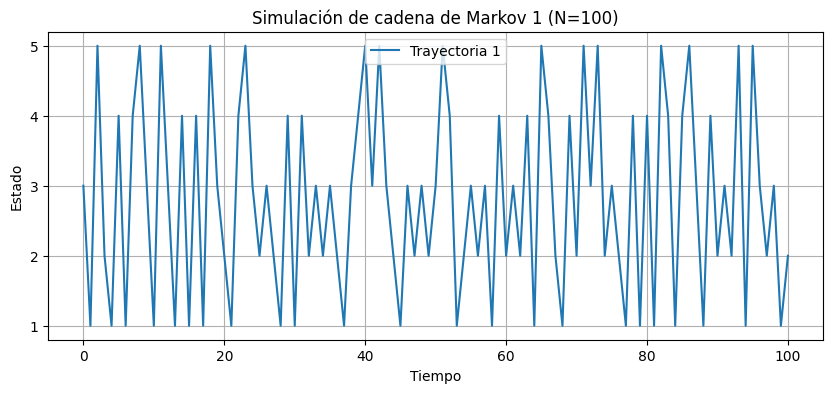

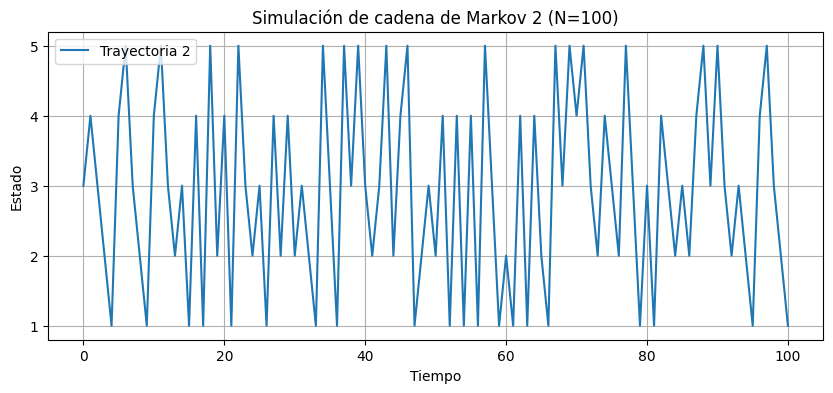

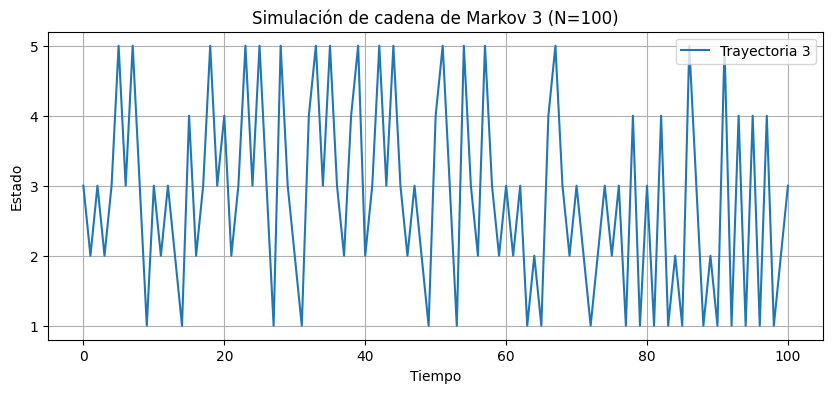


Distribución estacionaria estimada a partir de una trayectoria (N=1000):
[0.21 0.23 0.26 0.13 0.17]

Distribución estacionaria estimada a partir de 1000 trayectorias (N=100):
[0.18 0.21 0.25 0.16 0.2 ]
--------------------------------------------------------------------------------

Distribución estacionaria teórica:
[0.2  0.21 0.26 0.15 0.18]

Distribución estacionaria estimada a partir de una trayectoria (N=1000):
[0.21 0.23 0.26 0.13 0.17]

Distribución estacionaria estimada a partir de 1000 trayectorias (N=100):
[0.18 0.21 0.25 0.16 0.2 ]

 ---------- Una trayectoria ----------

Diferencia entre distribuciones estacionarias (teórica - una trayectoria N=1000):
[-0.01 -0.02  0.    0.01  0.01]

MSE entre distribuciones estacionarias (teórica - una trayectoria N=1000):
1.68e-04

Tiempo de ejecución: 0.02 segundos

 ---------- Múltiples trayectorias ----------

Diferencia entre distribuciones estacionarias (teórica - 1000 trayectorias N=100):
[ 0.02 -0.    0.01 -0.01 -0.02]

MSE entre 

In [2]:
P = np.array([
    [0.0, 0.2, 0.1, 0.4, 0.3],
    [0.3, 0.0, 0.5, 0.1, 0.1],
    [0.3, 0.4, 0.0, 0.1, 0.2],
    [0.3, 0.3, 0.1, 0.0, 0.3],
    [0.1, 0.1, 0.7, 0.1, 0.0]
])

# 1. Resolver la solución estacionaria

# El meotod eig nos devuelve los autovectores derechos por lo que usamos la transpuesta
_, eigenvectors = np.linalg.eig(P.T)
pi = eigenvectors[:, 0].real
# La suma de los elementos de pi debe ser 1, así que normalizamos
pi /= pi.sum()

states = np.arange(1, 6)
print(f"Distribución estacionaria:\n{states}\n{pi.round(2)}")


# 2. Trayectorias para t = 0,1,..,N suponiendo estado t=0 se encuentra en el estado P(t=0) = P3

# Creamos la funcion en un archivo aparte como se nos indico en clase

N = 10
states = simulate_markov_chain(P, 3, N)
print(f"\nTrayectorias (N={N}):", states)

# 3. Graficar 3 trayectorias de longitud N=100

N = 100
states = [simulate_markov_chain(P, 3, N) for _ in range(3)]

# Ploteadas asi porque todas en una sola grafica no se entienden
for i, s in enumerate(states):
    plt.figure(figsize=(10, 4))
    plt.plot(s, label=f"Trayectoria {i+1}")
    plt.yticks(np.arange(1, 6))
    plt.xlabel("Tiempo")
    plt.ylabel("Estado")
    plt.title(f"Simulación de cadena de Markov {i+1} (N={N})")
    plt.legend()
    plt.grid()
    plt.show()


# 4.1 Estima la distribucion estacionaria (pi) en base a una unica trayectoria

# Simulamos una trayectoria de longitud N
N_long = 1000

start = time.time()
states = simulate_markov_chain(P, 3, N_long, seed=True)
end = time.time()

one_traj_time = end - start

# Contamos cuantas veces aparece cada estado y dividimos por N
pi_est = np.bincount(states) / N_long

# Quitamos el [0] porque estamos usando 1 - 5 como estados
pi_est_single = pi_est[1:]

print(f"\nDistribución estacionaria estimada a partir de una trayectoria (N={N_long}):\n{pi_est_single.round(2)}")

# 4.2 Estima la distribucion del proceso en el limite t->infinito a partir de los estados finales de 1000 trayectorias simuladas

# Longitud de las trayectorias
N_short = 100
#  Num trayectorias
M = 1000

# Simulamos M trayectorias de longitud N
start = time.time()
states = np.array([simulate_markov_chain(P, 3, N_short) for _ in range(M)])
end = time.time()

multi_traj_time = end - start

# Tomamos el ultimo estado de cada trayectoria
final_states = states[:, -1]

# Contamos cuantas veces aparece cada estado (final) y dividimos por M
pi_est = np.bincount(final_states) / M

# Quitamos el [0] porque estamos usando 1 - 5 como estados
pi_est_multi = pi_est[1:]

print(f"\nDistribución estacionaria estimada a partir de {M} trayectorias (N={N}):\n{pi_est_multi.round(2)}")

# 4.3 Comparar las distribuciones estacionarias obtenidas

print("-" * 80)
print(f"\nDistribución estacionaria teórica:\n{pi.round(2)}")
print(f"\nDistribución estacionaria estimada a partir de una trayectoria (N={N_long}):\n{pi_est_single.round(2)}")
print(f"\nDistribución estacionaria estimada a partir de {M} trayectorias (N={N_short}):\n{pi_est_multi.round(2)}")

print("\n", "-" * 10, "Una trayectoria", "-" * 10)
print(f"\nDiferencia entre distribuciones estacionarias (teórica - una trayectoria N={N_long}):")
print((pi - pi_est_single).round(2))
print(f"\nMSE entre distribuciones estacionarias (teórica - una trayectoria N={N_long}):")
print(f"{np.square(pi - pi_est_single).mean():.2e}")
print(f"\nTiempo de ejecución: {one_traj_time:.2f} segundos")

print("\n", "-" * 10, "Múltiples trayectorias", "-" * 10)
print(f"\nDiferencia entre distribuciones estacionarias (teórica - {M} trayectorias N={N_short}):")
print((pi - pi_est_multi).round(2))
print(f"\nMSE entre distribuciones estacionarias (teórica - {M} trayectorias N={N_short}):")
print(f"{np.square(pi - pi_est_multi).mean():.2e}")
print(f"\nTiempo de ejecución: {multi_traj_time:.2f} segundos")


Hemos obtenido la distribución estacionaria de la cadena de Markov anterior de tres maneras distintas:

1. Calculando los autovectores de la matriz.
2. Simulando una trayectoria larga y estimando la distribución estacionaria a partir de la frecuencia de visita a cada estado.
3. Simulando muchas trayectorias cortas y estimando la distribución estacionaria a partir de la frecuencia de visita a cada estado.

Luego, hemos comparado los resultados obtenidos midiendo la distancia entre las distribuciones obtenidas de manera numérica y la distribución estacionaria exacta, además, también hemos medido el error cuadrático medio y el tiempo de ejecución de cada método.

En los resultados obtenidos, se observa que el método de simulación de una trayectoria larga es el más rápido con un tiempo de ejecución de 0.02 segundos mientras que el método de simulación de muchas trayectorias cortas ha tardado 1.49 segundos. Por otro lado, el método de una única trayectoria ha conseguido un error cuadrático medio de $1.68*10^{-4}$ mientras que el método de muchas trayectorias cortas ha obtenido un error cuadrático medio de $2.35*10^{-4}$.

Aunque el método de de única trayectoria haya conseguido un error menor, ambos métodos se mantienen en el mismo orden de magnitud y sin embargo, el método de muchas trayectorias cortas ha tardado mucho más tiempo en ejecutarse. Por lo tanto, dependiendo de la precisión que se quiera obtener y los recursos computacionales disponibles, se puede elegir uno u otro método.

#### Ejercicio 2.
Suponiendo que se trata de una cadena de Markov en tiempo continuo, y que, en promedio, el proceso pasa $2$ minutos en $P_1,$ $30$ segundos en $P_2$, $1$ minuto en $P_3$, $1.5$ minutos en $P_4$, y $3$ minutos en $P_5$.

$$
\begin{array}{c|c|c|c|c}
\text{Estado inicial / final} & P_1 & P_2 & P_3 & P_4 & P_5\\
\hline
P_1 & *    & 0.2  & 0.1 & 0.4 & 0.3    \\
P_2 & 0.3  & *    & 0.5 & 0.1 & 0.1     \\
P_3 & 0.3  & 0.4  & *   & 0.1 & 0.2     \\
P_4 & 0.3  & 0.3  & 0.1 & *   & 0.3 \\
P_5 & 0.1  & 0.1  & 0.7 & 0.1  & * 
\end{array}
$$

1. Escribe la matriz de transiciones para el proceso de saltos subyacente (*jump process*). 
2. Deriva la distribución estacionaria para el proceso de saltos.
3. Deriva la distribución estacionaria para la cadena de Markov en tiempo continuo.
4. Deriva el correspondiente generador infinitesimal.
5. A partir del generador infinitesimal deriva la distribucón estacionaria del proceso y compárala con el resultado anterior.
6. Simula trayectorias del proceso suponiendo que en el instante $t = 0$ el sistema se encuentra en el estado $P(t=0)  = P_1$.
7. Utilizando la secuencia de estados de la cadena de Markov en el régimen estacionario:
    1. Estima la distribución estacionaria del proceso de saltos subyacente a partir de una única trayectoria de la cadena de Markov en tiempo continuo. 
    2. Estima la distribución estacionaria de la cadena de Markov en tiempo continuo a partir de una única trayectoria del proceso. 
    3. Estima la distribución de la cadena de Markov en tiempo continuo en el límite $t \rightarrow \infty$ a partir de los estados finales en $M = 1000$ trayectorias simuladas.
    4. Comenta los resultados de los apartados anteriores.

8. ¿Coinciden las distribuciones estacionarias de una cadena de Markov en tiempo discreto con el mismo diagrama de transición y la derivada para el proceso en tiempo continuo? En caso de que coincidan indica la razón. En caso de que no coincidan, define una cadena de Markov en tiempo continuo con el mismo diagrama de transiciones que tenga la misma distribución estacionaria que la correspondiente en tiempo discreto.


1: Jump Chain
[[0.  0.2 0.1 0.4 0.3]
 [0.3 0.  0.5 0.1 0.1]
 [0.3 0.4 0.  0.1 0.2]
 [0.3 0.3 0.1 0.  0.3]
 [0.1 0.1 0.7 0.1 0. ]]

2: Distribución estacionaria para el proceso de saltos:
[1 2 3 4 5]
[0.2  0.21 0.26 0.15 0.18]

3: Distribución estacionaria para la cadena de Markov en tiempo continuo

Distribución estacionaria para la cadena de Markov en tiempo continuo:
[1 2 3 4 5]
[0.27 0.07 0.17 0.14 0.35]

4: Generador infinitesimal
[[-0.5   0.1   0.05  0.2   0.15]
 [ 0.6  -2.    1.    0.2   0.2 ]
 [ 0.3   0.4  -1.    0.1   0.2 ]
 [ 0.2   0.2   0.07 -0.67  0.2 ]
 [ 0.03  0.03  0.23  0.03 -0.33]]

5: Distribución estacionaria en base al generador infinitesimal
[0.27 0.07 0.17 0.14 0.35]

6: Simulacion de trayectorias sabiendo que P(t=0) = P1


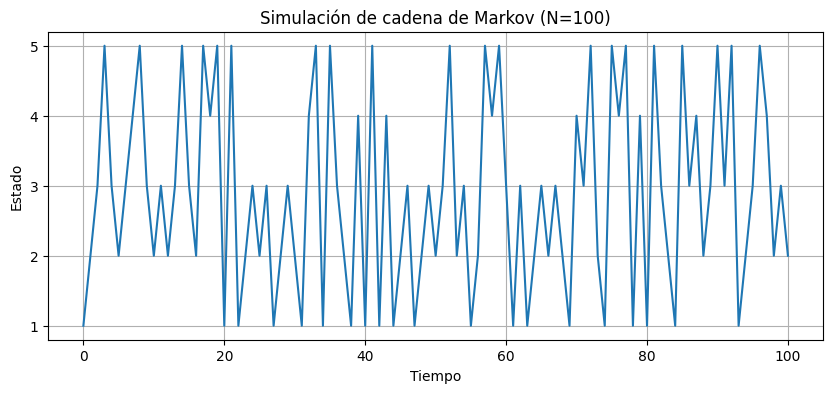


7.1 Estima distribución estacionaria del proceso de saltos a partir de una única trayectoria

Distribución estacionaria estimada a partir de una trayectoria (N=1000):
[0.21 0.23 0.26 0.14 0.17]

7.2 Estima distribución estacionaria de la cadena de Markov en tiempo continuo a partir de una única trayectoria
Distribución estacionaria estimada a partir de una trayectoria (N=1000):
[0.28 0.08 0.17 0.14 0.33]
Tiempo de ejecución: 0.02 segundos

MSE entre distribuciones estacionarias (teórica - una trayectoria N=1000):
1.58e-04

7.3 Estimacion de la distribucion de la cadena de Markov en tiempo continuo en el limite t -> inf de 1000 trayectorias
Distribución estacionaria estimada a partir de 1000 trayectorias (N=100):
[0.24 0.07 0.16 0.15 0.38]
Tiempo de ejecución: 1.61 segundos

MSE entre distribuciones estacionarias (teórica - 1000 trayectorias N=100):
4.41e-04


In [19]:
# 1: La matriz de transiciones para el proceso de saltos subyacente (jump process) es la del ejercicio anterior
print("\n1: Jump Chain")
P = np.array([
    [0.0, 0.2, 0.1, 0.4, 0.3],
    [0.3, 0.0, 0.5, 0.1, 0.1],
    [0.3, 0.4, 0.0, 0.1, 0.2],
    [0.3, 0.3, 0.1, 0.0, 0.3],
    [0.1, 0.1, 0.7, 0.1, 0.0]
])
print(P)

# 2: La distribución estacionaria es la misma que en el ejercicio anterior, encontrar el autovector izquierdo
_, eigenvectors = np.linalg.eig(P.T)
pi_jump = eigenvectors[:, 0].real
pi_jump /= pi_jump.sum()

states = np.arange(1, 6)
print(f"\n2: Distribución estacionaria para el proceso de saltos:\n{states}\n{pi_jump.round(2)}")

# 3: Distribución estacionaria para la cadena de Markov en tiempo continuo

print("\n3: Distribución estacionaria para la cadena de Markov en tiempo continuo")

# 1/lambda is the average time that the process stays in a state
tiempos = np.array([2, 0.5, 1, 1.5, 3])
rates = 1 / tiempos
pi_markov = pi_jump / rates
pi_markov /= pi_markov.sum()

print(f"\nDistribución estacionaria para la cadena de Markov en tiempo continuo:\n{states}\n{pi_markov.round(2)}")

#  4: Generador infinitesimal
print("\n4: Generador infinitesimal")

# slide 11
# si i != j, G[i, j] = lambda_i * P[i, j]
# si i == j, G[i, j] = -lambda_i(1 - P[i, i])

G = np.zeros((5, 5))
for i in range(5):
    for j in range(5):
        if i != j:
            G[i, j] = rates[i] * P[i, j]
        else:
            G[i, j] = -rates[i] * (1 - P[i, i])

print(G.round(2))

# 5. Distribucion estacionaria en base al generador infinitesimal
print("\n5: Distribución estacionaria en base al generador infinitesimal")

# slide 16
# pi^t * G = 0

GT = np.copy(G).T
GT[-1] = 1
b = np.zeros(len(GT))
b[-1] = 1

pi_stationary = np.linalg.solve(GT, b)
print(pi_stationary.round(2))

# 6. Simula trayectorias del proceso suponiendo que en el instante $t = 0$ el sistema se encuentra en el estado $P(t=0)  = P_1$.

print("\n6: Simulacion de trayectorias sabiendo que P(t=0) = P1")

N = 100
initial = 1
states = simulate_markov_chain(P, initial, N)

plt.figure(figsize=(10, 4))
plt.plot(states)
plt.yticks(np.arange(1, 6))
plt.xlabel("Tiempo")
plt.ylabel("Estado")
plt.title(f"Simulación de cadena de Markov (N={N})")
plt.grid()
plt.show()

# 7. Utilizando la secuencia de estados de la cadena de Markov en el régimen estacionario:

# 7.1 Estima la distribución estacionaria del proceso de saltos subyacente a partir de una única trayectoria de la cadena de Markov en tiempo continuo.
print("\n7.1 Estima distribución estacionaria del proceso de saltos a partir de una única trayectoria")

N_long = 1000
states = simulate_markov_chain(P, 1, N_long, seed=True)
pi_est = np.bincount(states) / N_long
pi_est_single = pi_est[1:]

print(f"\nDistribución estacionaria estimada a partir de una trayectoria (N={N_long}):\n{pi_est_single.round(2)}")

# 7.2 Estima la distribución estacionaria de la cadena de Markov en tiempo continuo a partir de una única trayectoria del proceso.

print("\n7.2 Estima distribución estacionaria de la cadena de Markov en tiempo continuo a partir de una única trayectoria")

# Para este caso, necesitamos la simulacion pero tambien los tiempos de permanencia en cada estado
# Entiendo el enunciado como que podemos usar los tiempos que se pasa en cada estado dados en el enunciado

indices = np.arange(len(P))
# Calculamos los tiempos de permanencia en cada estado
tiempos = np.array([2, 0.5, 1, 1.5, 3])
# Calculamos los rates de salida
rates = 1 / tiempos

# Simulamos una trayectoria de longitud N que nos da los estados y los tiempos de permanencia
N_long = 1000

# Simulamos una trayectoria de la cadena de Markov
start = time.time()
states = simulate_markov_chain(P, 1, N_long, seed=True)
time_spent = np.zeros(len(P))

# Para cada estado, sumamos el tiempo que se pasa en el (dados en el enunciado)
for state in states:
    # Restamos 1 para índices pq devuelve empezando en 1
    time_spent[state - 1] += tiempos[state - 1]

pi_simulated = time_spent / time_spent.sum()
end = time.time()

one_traj_time = end - start
print(f"Distribución estacionaria estimada a partir de una trayectoria (N={N_long}):\n{pi_simulated.round(2)}")
print(f"Tiempo de ejecución: {one_traj_time:.2f} segundos")

# Calcular MSE
print(f"\nMSE entre distribuciones estacionarias (teórica - una trayectoria N={N_long}):")
print(f"{np.square(pi_markov - pi_simulated).mean():.2e}")

# 7.3 Estima la distribución de la cadena de Markov en tiempo continuo en el límite $t \rightarrow \infty$ a partir de los estados finales en $M = 1000$ trayectorias simuladas.

print("\n7.3 Estimacion de la distribucion de la cadena de Markov en tiempo continuo en el limite t -> inf de 1000 trayectorias")

N_short = 100
M = 1000

start = time.time()
# Simulamos M trayectorias de longitud N
states = np.array([simulate_markov_chain(P, 1, N_short) for _ in range(M)])

# Cogemos el último estado de cada trayectoria
final_states = states[:, -1]

# Calculamos el tiempo que se pasa en cada estado
time_spent = np.zeros(len(P))
for state in final_states:
    time_spent[state - 1] += tiempos[state - 1]

pi_est = time_spent / time_spent.sum()
end = time.time()

multi_traj_time = end - start
print(f"Distribución estacionaria estimada a partir de {M} trayectorias (N={N_short}):\n{pi_est.round(2)}")
print(f"Tiempo de ejecución: {multi_traj_time:.2f} segundos")

# Calcular MSE
print(f"\nMSE entre distribuciones estacionarias (teórica - {M} trayectorias N={N_short}):")
print(f"{np.square(pi_markov - pi_est).mean():.2e}")


#### 7.4

Al igual que en el ejercicio 1, hemos obtenido con ambas simulaciones valores muy cercanos, esta vez consiguiendo con el metodo de varias trayectorias incluso un error menor aunque aún así con un tiempo de ejecución mucho mayor. Por lo que, al igual que en el ejercicio 1, se puede elegir uno u otro método dependiendo de la precisión que se quiera obtener y los recursos computacionales disponibles.

#### 8

Las distribuciones estacionarias de una cadena de Markov en tiempo discreto con el mismo diagrama de transición y la derivada para el proceso en tiempo continuo no coinciden.

Esto se debe a la manera en la que se comportan estos procesos. En tiempo discreto, las transiciones entre estados se realizan por cada uno de los instantes de tiempo, es decir, cada vez que pasa una unidad de tiempo, el procesos avanza según las probabilidades indicadas en la matriz de transición. Por otro lado, en tiempo continuo, las transiciones entre estados se realizan de manera continua, es decir, el proceso puede cambiar de estado en cualquier instante de tiempo (siguiendo una distribución exponencial).

Por lo tanto, aunque las probabilidades de transición entre estados sean las mismas, la manera en la que se comportan estos procesos es distinta, lo que hace que las distribuciones estacionarias no coincidan.

Para definir una cadena de Markov en tiempo continuo con el mismo diagrama de transiciones que tenga la misma distribución estacionaria que la correspondiente en tiempo discreto, se puede utilizar la matriz de transición de la cadena de Markov en tiempo discreto y calcular sus estados estacionarios. A partir de estos estados estacionarios, generar el generador infinitesimal y a partir de este, obtener la distribución estacionaria del proceso en tiempo continuo y comprobar que coincide con la previa.
